In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
%matplotlib inline 

In [2]:
data = pd.read_csv("./A4/Data_SVM.csv")
data.head()

,V1,V2,V3
0,-0.610352,0.115276,-1
1,-0.602102,0.065829,-1
2,-0.906641,-0.420250,1
3,-0.792383,0.185689,-1
4,0.796760,0.252724,1


# Plotting of Data

[]

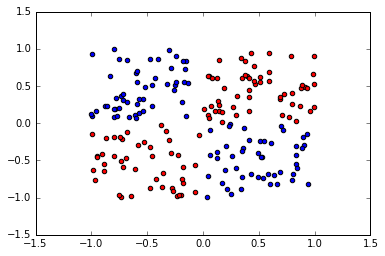

In [6]:
M = data.as_matrix()
List= M.tolist()
class_one_itemx = [item[0] for item in List if item[2]==1]
class_two_itemx = [item[0] for item in List if item[2]==-1]
class_one_itemy = [item[1] for item in List if item[2]==1]
class_two_itemy = [item[1] for item in List if item[2]==-1]
itemy = [item[1] for item in List]
data_set = [[item[0],item[1]] for item in List]
label = [item[2] for item in List]
plt.scatter(class_one_itemx,class_one_itemy,c="red")
plt.scatter(class_two_itemx,class_two_itemy,c="blue")
plt.plot()

# Polynomial kernel

Penalty parameter `C` of the error term.<br>
`kernel` : string, optional (default=’rbf’)
Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used.<br>
`degree` : int, optional (default=3)
Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.


In [8]:
##Parameter tuning
c_val=[1,10,100,1000]
d_val=[2,3,4]
final_score=[]
for c in c_val:
    for d in d_val:
        clf = svm.SVC(kernel='poly', degree=d, C=c).fit(data_set, label)
        ## using evaluation matrics as "accuracy"
        ## score is nnumpy array of 10 accuracy scores
        for i in range(30):
            cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
            scores = cross_val_score(clf, data_set, label, cv=cv,scoring='accuracy')
            final_score.append(scores.mean())
#             print scores
        final_scores=np.array(final_score)
        print c,d
        print("Accuracy: %0.2f (+/- %0.2f)" % (final_scores.mean(), final_scores.std() * 2))

1 2
Accuracy: 0.97 (+/- 0.00)
1 3
Accuracy: 0.70 (+/- 0.55)
1 4
Accuracy: 0.74 (+/- 0.47)
10 2
Accuracy: 0.80 (+/- 0.45)
10 3
Accuracy: 0.72 (+/- 0.51)
10 4
Accuracy: 0.75 (+/- 0.48)
100 2
Accuracy: 0.78 (+/- 0.48)
100 3
Accuracy: 0.74 (+/- 0.50)
100 4
Accuracy: 0.76 (+/- 0.49)
1000 2
Accuracy: 0.79 (+/- 0.49)
1000 3
Accuracy: 0.76 (+/- 0.50)
1000 4
Accuracy: 0.77 (+/- 0.49)


### Plotting boundary of polynomial kernel for c=1 and d=2

(-1.5, 1.5)

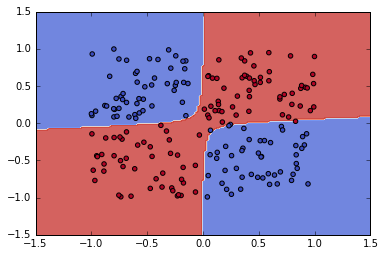

In [10]:
clf = svm.SVC(kernel='poly', degree=2, C=1).fit(data_set, label)
h = .02
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter([item[0] for item in data_set],[item[1] for item in data_set], c=label, cmap=plt.cm.coolwarm)
axis=plt.gca()
axis.set_xlim([-1.5,1.5])
axis.set_ylim([-1.5,1.5])

# Gaussian Kernel

Intuitively, the gamma parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.<br>
The C parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.


In [13]:
## Parameter tuning
C_range = [1e-2, 1, 1e2]
gamma_range = [1e-1, 1, 1e1]
final_score=[]
for c in C_range:
    for gamma in gamma_range:
        clf = svm.SVC(kernel='rbf', gamma=d, C=c).fit(data_set, label)
        ## using evaluation matrics as "accuracy"
        ## score is nnumpy array of 10 accuracy scores
        for i in range(30):
            cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=0)
            scores = cross_val_score(clf, data_set, label, cv=cv,scoring='accuracy')
            final_score.append(scores.mean())
        final_scores=np.array(final_score)
        print c,gamma
        print("Accuracy: %0.2f (+/- %0.2f)" % (final_scores.mean(), final_scores.std() * 2))


0.01 0.1
Accuracy: 0.46 (+/- 0.00)
0.01 1
Accuracy: 0.46 (+/- 0.00)
0.01 10.0
Accuracy: 0.46 (+/- 0.00)
1 0.1
Accuracy: 0.59 (+/- 0.46)
1 1
Accuracy: 0.67 (+/- 0.52)
1 10.0
Accuracy: 0.73 (+/- 0.53)
100.0 0.1
Accuracy: 0.76 (+/- 0.53)
100.0 1
Accuracy: 0.79 (+/- 0.52)
100.0 10.0
Accuracy: 0.81 (+/- 0.50)


### plotting gaussian kernel decision boundary for  c=100 and gamma=10 

(-1.5, 1.5)

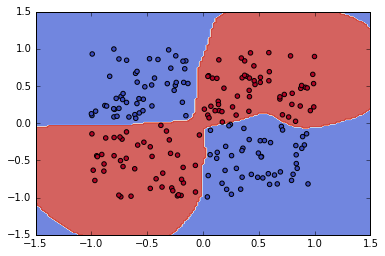

In [14]:
clf = svm.SVC(kernel='rbf', gamma=10, C=100).fit(data_set, label)
h = .02
x_min, x_max = -2, 2
y_min, y_max = -2, 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter([item[0] for item in data_set],[item[1] for item in data_set], c=label, cmap=plt.cm.coolwarm)
axis=plt.gca()
axis.set_xlim([-1.5,1.5])
axis.set_ylim([-1.5,1.5])
